# **Project Title: HEALTH INSURANCE CROSS SELL PREDICTION**

**Project Type**    - Classification
##### **Contribution**    - Individual


# **GitHub Link -** -

# **Problem Description**

Our client is an Insurance company that has provided Health Insurance to its customers. Now they need the help in building a model to predict whether the policyholders (customers) from the past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue.



## **Attribute Information**

id : Unique ID for the customer

Gender : Gender of the customer

Age : Age of the customer

Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code : Unique code for the region of the customer

Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age : Age of the Vehicle

Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium : The amount customer needs to pay as premium in the year

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage : Number of Days, Customer has been associated with the company

Response : 1 : Customer is interested, 0 : Customer is not interested

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report,roc_curve,roc_auc_score

# **Loading Dataset**

In [ ]:
df=pd.read_csv("/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION (1).csv")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# **Description of Data**

In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# **Cleaning Data**

In [ ]:
#finding the total null values in dataframe
total_missing_values = df.isna().sum()
print(total_missing_values)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [ ]:
#finding the best policy selling agent
policy_counts=df['Policy_Sales_Channel'].value_counts()
policy_counts=policy_counts.head(20)
policy_counts

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
122.0      9930
157.0      6684
154.0      5993
151.0      3885
163.0      2893
13.0       1865
25.0       1848
7.0        1598
8.0        1515
30.0       1410
55.0       1264
155.0      1234
11.0       1203
1.0        1074
52.0       1055
Name: Policy_Sales_Channel, dtype: int64

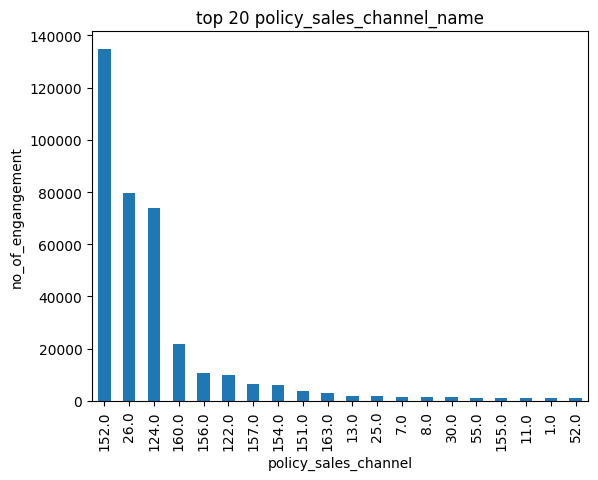

In [ ]:
policy_counts.plot(kind='bar')
plt.title('top 20 policy_sales_channel_name')
plt.ylabel('no_of_engangement')
plt.xlabel('policy_sales_channel')
plt.rcParams['figure.figsize']=(10,5)

152.0 Policy Channel Tried To Sell Large Number Of Insurance

<Axes: xlabel='Response', ylabel='count'>

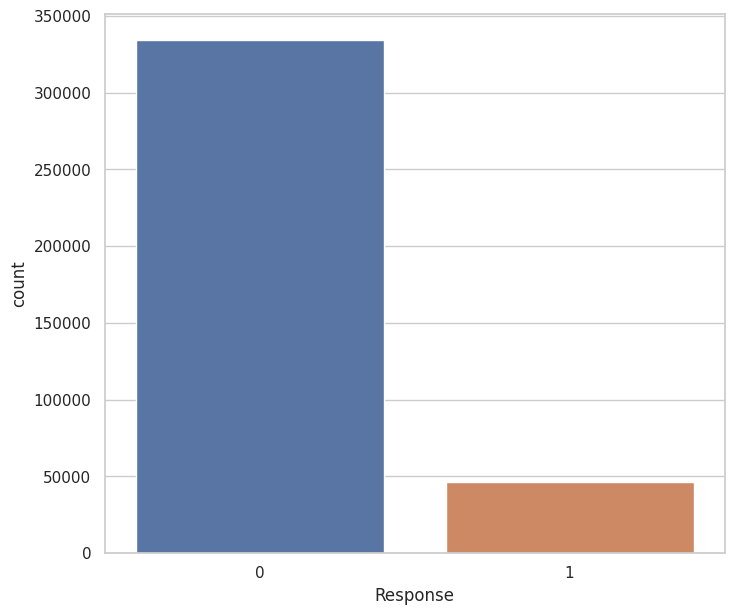

In [ ]:
#Dependent variable 'Response'
plt.figure(figsize=(8,7))
sns.set_theme(style='whitegrid')
sns.countplot(x=df['Response'],data=df)

0 RESPONCE IS MORE COMPARED TO 1

<Axes: xlabel='Age', ylabel='count'>

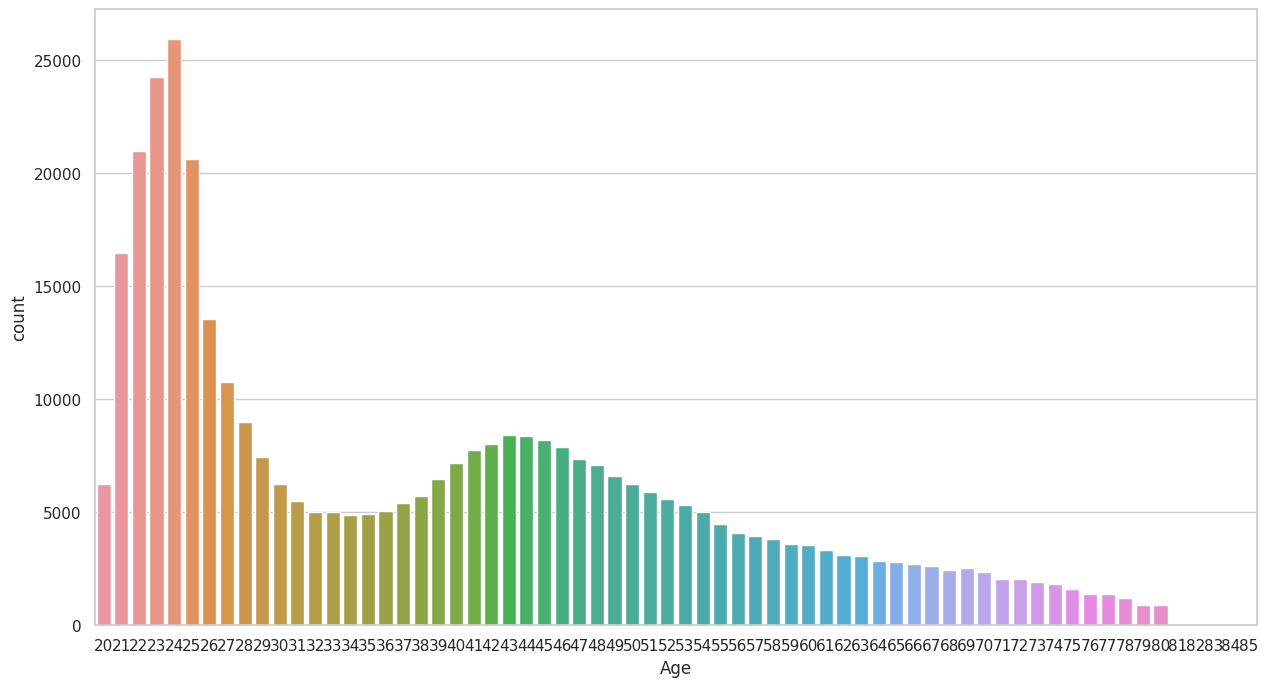

In [ ]:
#Distribution of Age
plt.figure(figsize=(15,8))
sns.countplot(x=df['Age'],data=df)

**21 TO 28 PEOPLES ARE MORE BUYING INSURANCE**

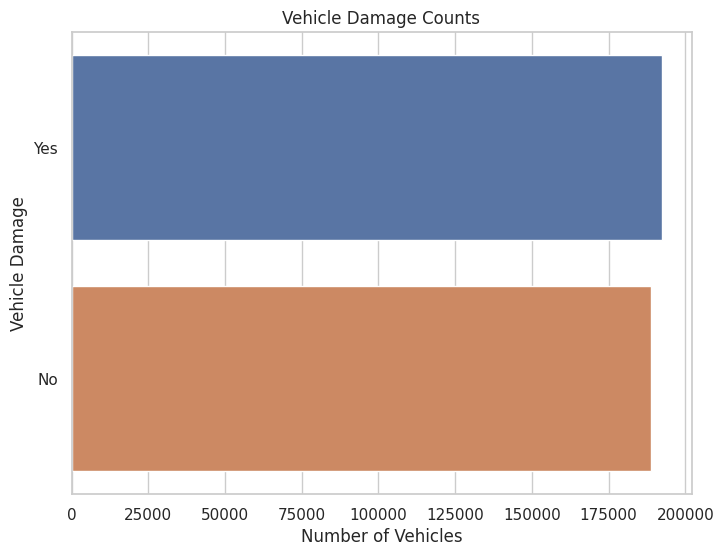

In [ ]:
#vehicle damage people likely to mroe engaged in insurance platform.
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframe with vehicle damage counts
vehicle_damage_counts = df['Vehicle_Damage'].value_counts()

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=vehicle_damage_counts.values, y=vehicle_damage_counts.index, ax=ax)

# Set chart title and axis labels
ax.set_title('Vehicle Damage Counts')
ax.set_xlabel('Number of Vehicles')
ax.set_ylabel('Vehicle Damage')

# Show chart
plt.show()

<Axes: >

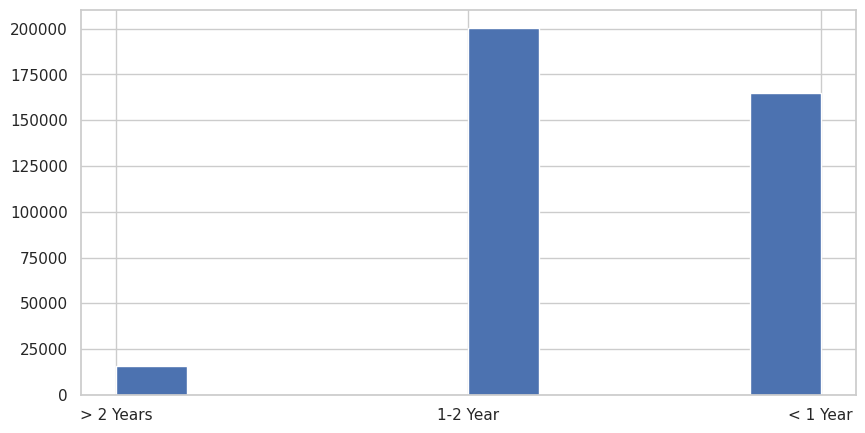

In [ ]:

df['Vehicle_Age'].hist()

**From the Below above we can see that most of the people are having vehicle age between 1 or 2 years and very few people are having vehicle age more than 2 years **

#BIAVARIATE ANALYSIS

<Axes: xlabel='Gender', ylabel='count'>

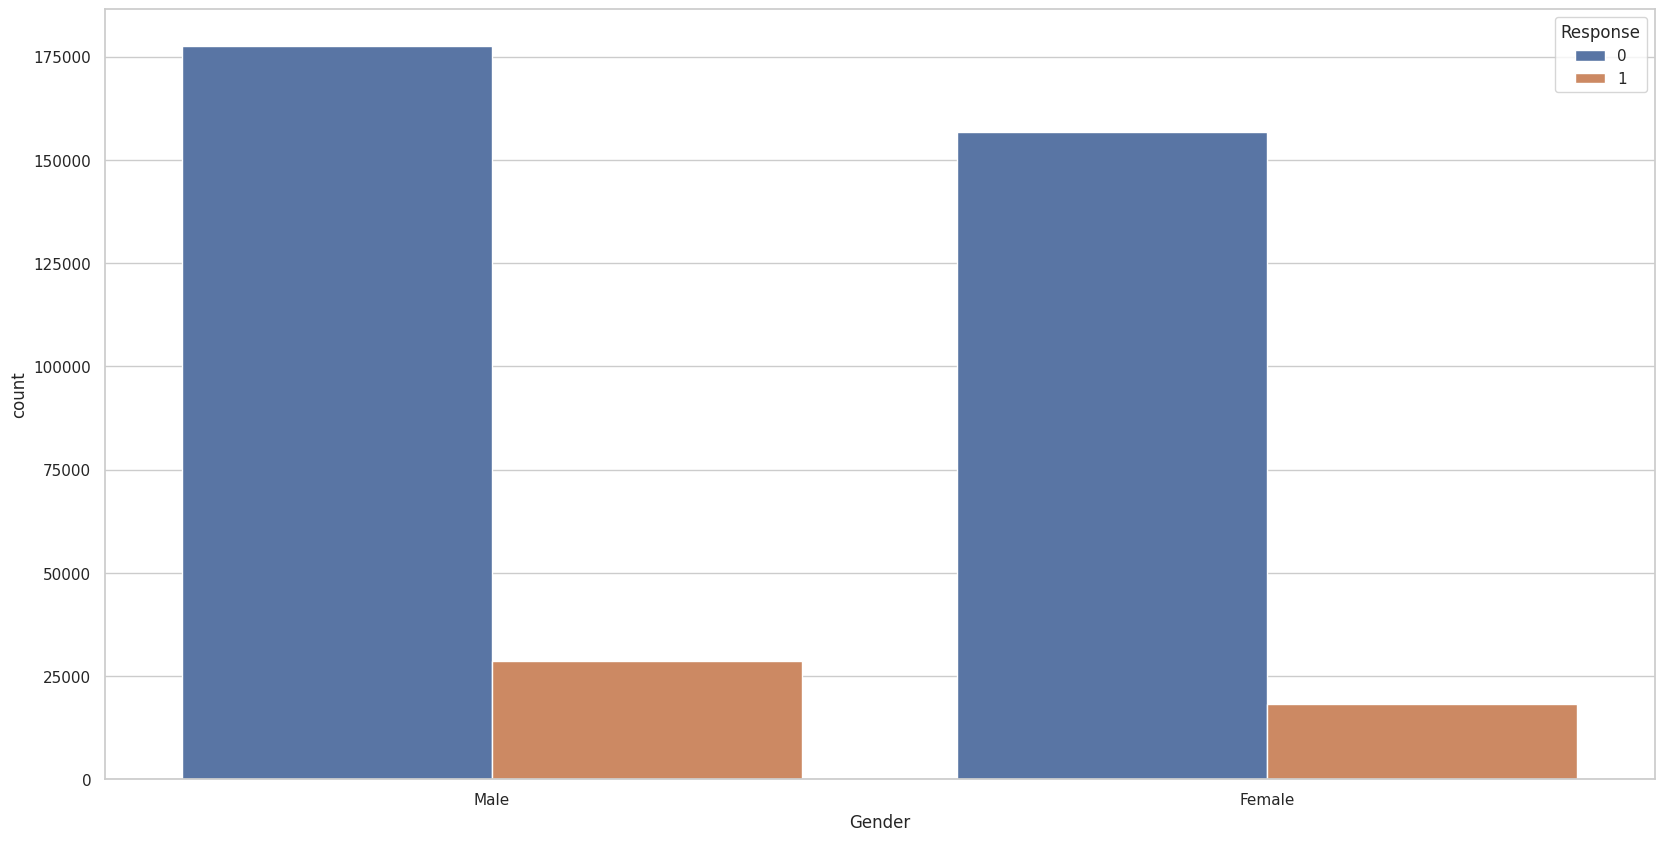

In [ ]:
# compared beetweeen  gender and Response
plt.figure(figsize=(20,10))
sns.countplot(x='Gender',hue='Response',data=df)

male are buying more insurance as compared to women

<Axes: xlabel='Previously_Insured', ylabel='count'>

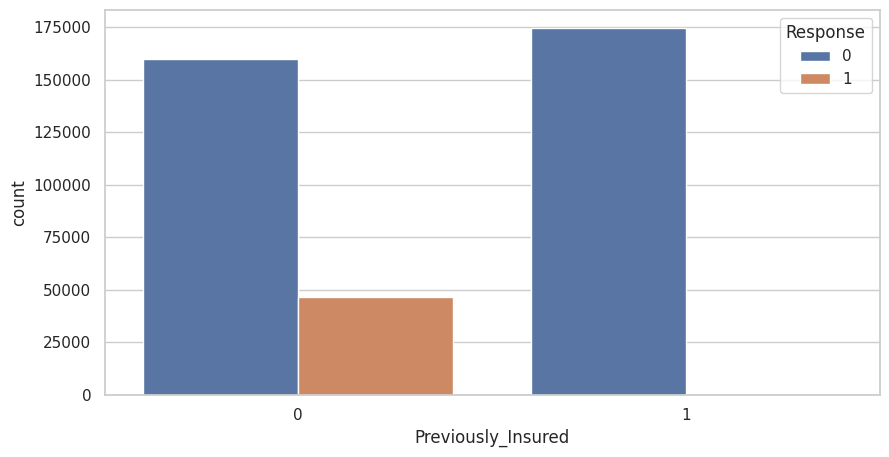

In [ ]:
#COMPARISON BETWEEN PREVIOUS BOUGHT INSURANCE AND NEW CUSTOMER
plt.figure(figsize=(10,5))
sns.countplot(x='Previously_Insured',hue='Response',data=df)

customer who havent bought any previously insured are more likely to purchase insurance

<Axes: xlabel='Driving_License', ylabel='count'>

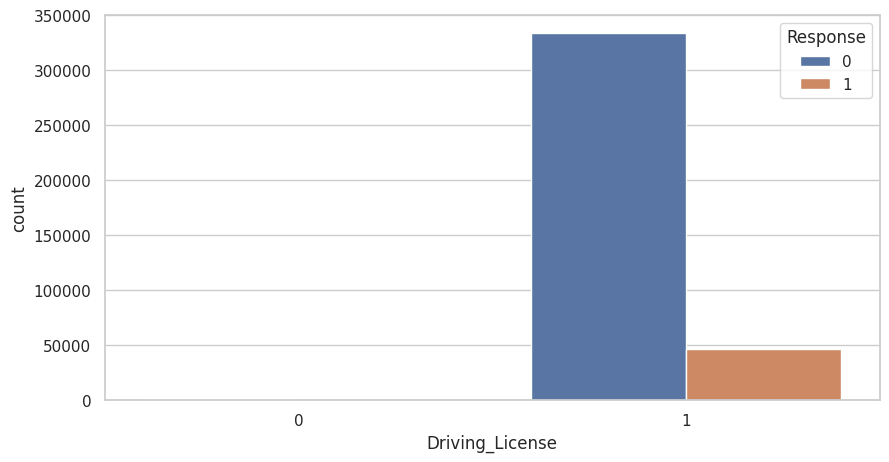

In [ ]:
#ARE CUSTOMERS HAVE A DRIVING LICENCE OR NOT

sns.countplot(x=df['Driving_License'],hue=df['Response'])

ALLMOST ALL CUSTOMER HAVE A DRIVING LICENSE

Text(0.5, 0, 'Responce')

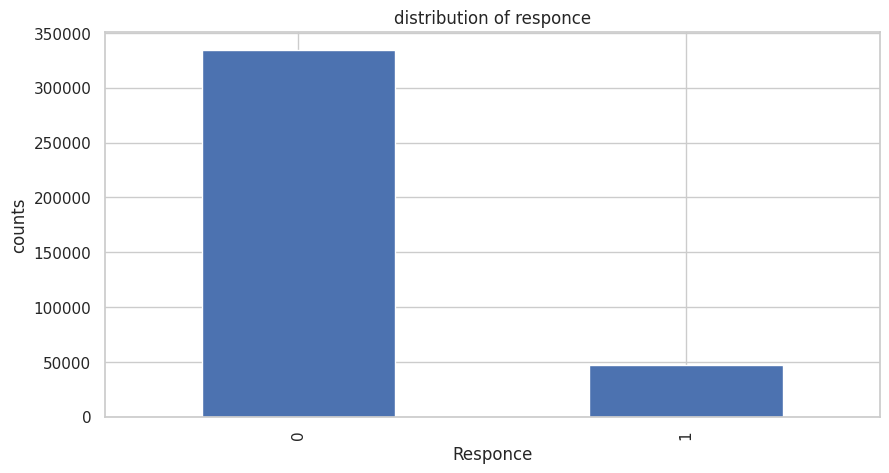

In [ ]:
#RESPONCE COUNTS
responce=df['Response'].value_counts()
responce.plot(kind='bar')
plt.title('distribution of responce')
plt.ylabel('counts')
plt.xlabel('Responce')


**customer no responce is far greater then responce**

Customers who are interested in Vehicle Insurance almost all have driving license

**#changing categorical value to numerical values**

In [ ]:
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})
df['Vehicle_Age'] = df['Vehicle_Age'].replace({'< 1 Year':1, '1-2 Year':2,'> 2 Years':3})
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace({'Yes':1, 'No':0})
df['Driving_License'] = df['Driving_License'].replace({0:1})
df['Driving_License'] = df['Driving_License'].replace({0:1})

In [ ]:
#drop not used columns
df = df.drop(['id','Driving_License'], axis=1)

## SKEWNESS OF DATA

In [ ]:
skewness = df.skew()
print(skewness)

Gender                 -0.163590
Age                     0.672539
Region_Code            -0.115266
Previously_Insured      0.167747
Vehicle_Age             0.252896
Vehicle_Damage         -0.019507
Annual_Premium          1.766087
Policy_Sales_Channel   -0.900008
Vintage                 0.003030
Response                2.301906
dtype: float64


skewness of response and annual_premium is too high

<Axes: >

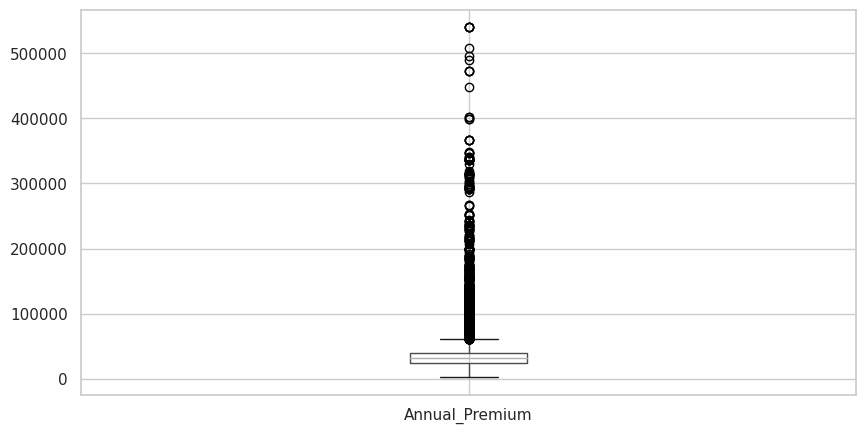

In [ ]:
df[['Annual_Premium']].boxplot()

<ipython-input-21-e57aad2a91f1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual_Premium'],color='Blue')


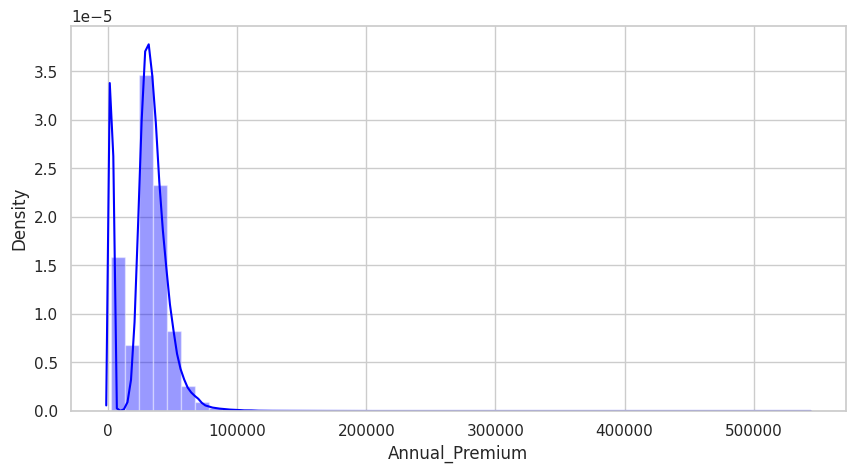

In [ ]:
sns.distplot(df['Annual_Premium'],color='Blue')
plt.show()

From the distribution plot we can infer that the annual premimum variable is right skewed
From the boxplot we can observe lot of outliers in the variable

# **reducing outliers of annual_premium**

In [ ]:
#using iqr range to reduce outliers
#taking only 10 to 99 percentile value
percentile10 = df['Annual_Premium'].quantile(0.10)
percentile99 = df['Annual_Premium'].quantile(0.99)

In [ ]:
print("99th quartile: ",percentile99)
print("10th quartile: ",percentile10)

99th quartile:  72963.0
10th quartile:  2630.0


99% values are between 726963 it means 1% is outliers but we cant drop 1% because insurance plan cost is high in high age people ,but can go beyond 99 and less than 100 percentile  to reduce outliers

In [ ]:
iqr = percentile99 - percentile10
print ("IQR: ",iqr)

IQR:  70333.0


In [ ]:
upper_limit_of_iqr=percentile99+1.5*iqr
print(upper_limit_of_iqr)

178462.5


In [ ]:
df = df.drop(df[df['Annual_Premium'] > upper_limit_of_iqr].index)
print(f"highest annual_premium plan is {df['Annual_Premium'].max()}")
df.shape

highest annual_premium plan is 177150.0


(380972, 10)

In [ ]:
#by reducing outlirs highest annual prelium we get 177150

In [ ]:
skewness = df.skew()
print(skewness)

Gender                 -0.163687
Age                     0.672693
Region_Code            -0.115119
Previously_Insured      0.167601
Vehicle_Age             0.252993
Vehicle_Damage         -0.019393
Annual_Premium          0.196666
Policy_Sales_Channel   -0.900226
Vintage                 0.003104
Response                2.302211
dtype: float64


now we are getting 0.19 skewness of annual_premium

<ipython-input-29-e57aad2a91f1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual_Premium'],color='Blue')


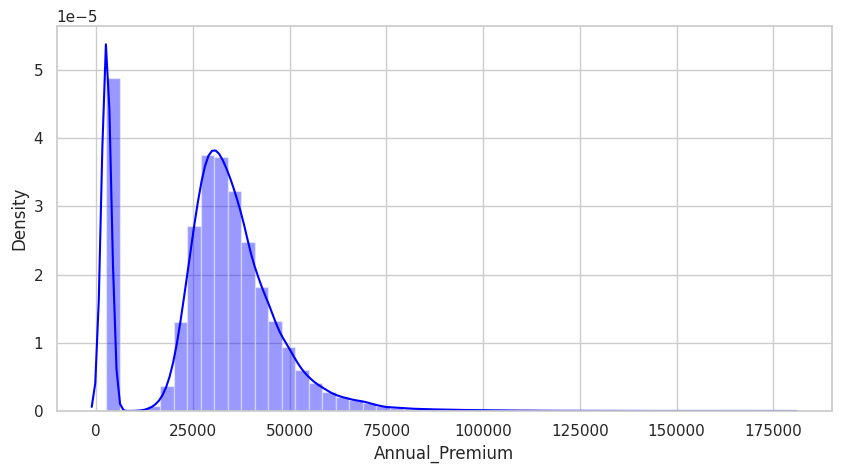

In [ ]:
sns.distplot(df['Annual_Premium'],color='Blue')
plt.show()

<Axes: >

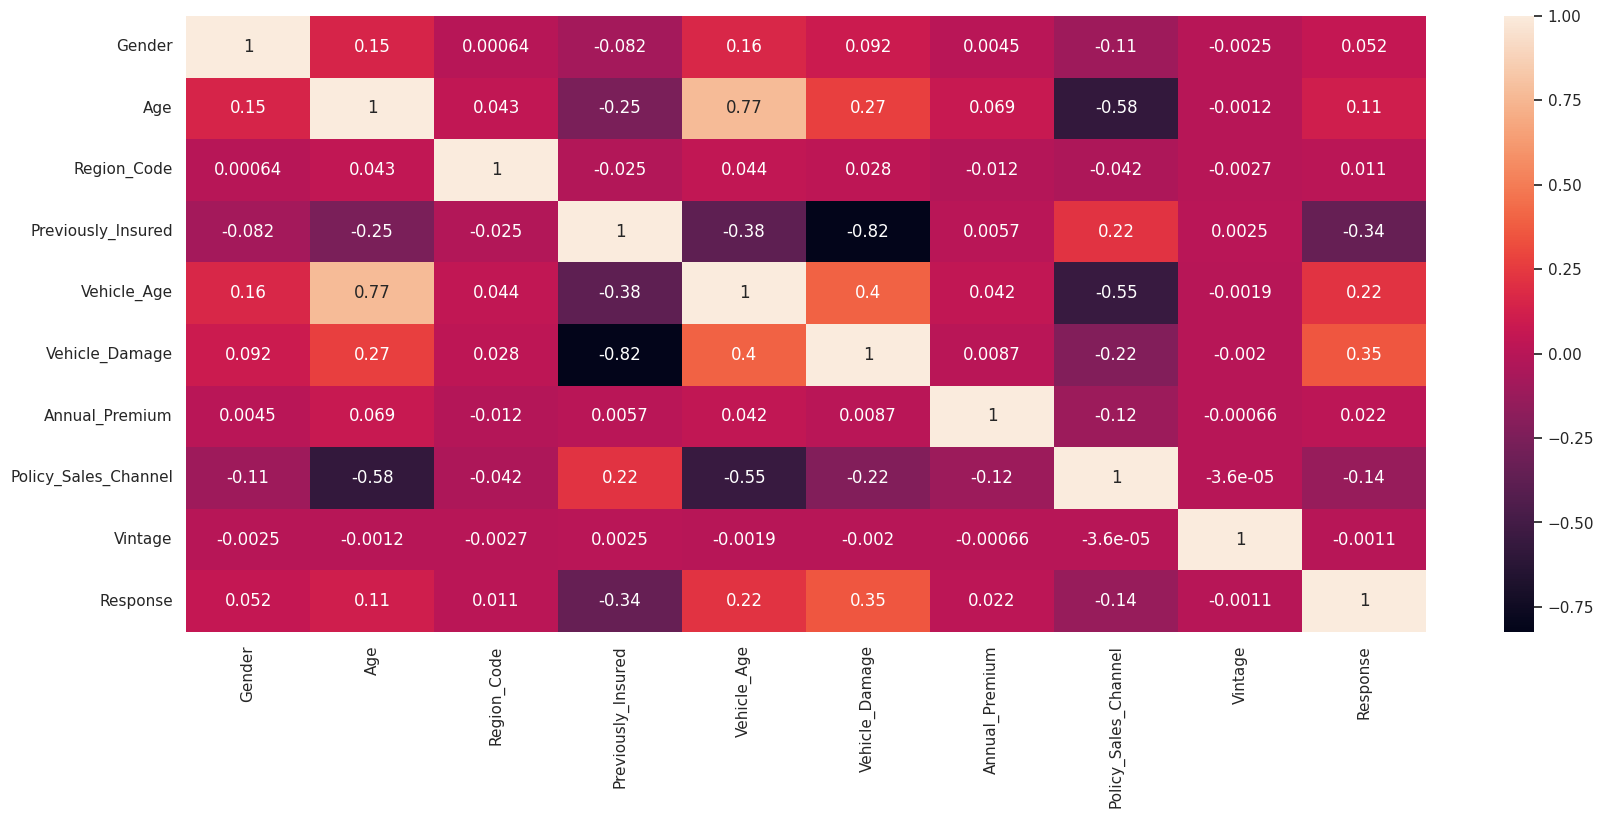

In [ ]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

# **DATA SCALING**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the DataFrame
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

MinMaxScaler is a normalization technique used to rescale the features of a dataset so that they have the same scale and range of values. Specifically, it transforms the values of each feature to a range between 0 and 1.

#  **Handling Imbalanced Dataset**

Handling Imbalanced data
When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the RESPONCE COLUMNS set. Solving this issue we use resampling technique.

In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state = 42, test_size = 0.3)


NameError: ignored

# **TRAIN AND TEST DATA**


In [ ]:
x=df.drop('Response',axis=1)

In [ ]:
y=df['Response']

In [ ]:
#dividing the dataset into training and testing into 70% and 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.3)

# **ML MODEL IMPLEMENTATION**

# **LOGISTIC REGERSSION**

In [ ]:
#fiting  x_train 1 and y_train 1 into Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

TRAIN SCORE :- 78.39%

In [ ]:
test_score_log=model.score(x_test, y_test)
print(f"test_Score_is {test_score_log}")

In [ ]:
y_pred_reg = model.predict(x_test)

In [ ]:
#printing classification report
print(classification_report(y_test, y_pred_reg))

In [ ]:
recall_lr=recall_score(y_test,y_pred_reg)
precision_lr=precision_score(y_test,y_pred_reg)
f1score_lr=f1_score(y_test,y_pred_reg)
AUC_LR=roc_auc_score(y_test,y_pred_reg)
print("ROC_AUC Score:",AUC_LR)
print("f1score_lr :",f1score_lr)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_reg)
print(cf_matrix)

In [ ]:
#printing confusion metrix.
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_reg)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_reg)
# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.text(0.5,0.5, f'AUC = {roc_auc:.2f}')
plt.show()

# **K NEAREST NEIBOUR**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

In [ ]:
train_score = knn.score(x_train, y_train)
print("Training score:", train_score)

In [ ]:
test_score_knn = knn.score(x_test, y_test)
print("Testing_Score:", test_score_knn)

In [ ]:
y_pred_knn = knn.predict(x_test)

In [ ]:
#accuracy_knn=accuracy_score(y_pred_knn,y_test)
AUC_SCORE=roc_auc_score(y_pred_knn,y_test)
recall_knn=recall_score(y_test,y_pred_knn)
precision_knn=precision_score(y_test,y_pred_knn)
f1score_knn=f1_score(y_test,y_pred_knn)
#print("accuracy:",accuracy)
print("ROC_AUC Score:",AUC_SCORE)
print("recall_knn Score:",recall_knn)
print("precision_knn Score:",precision_knn)
print("f1score_knn Score:",f1score_knn)

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_knn)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.text(0.5,0.5, f'AUC = {roc_auc:.2f}')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_knn))

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

In [ ]:
train_score = forest.score(x_train, y_train)
test_score_forest = forest.score(x_test, y_test)
print("Training score:", train_score)
print("Test score:", test_score_forest)

In [ ]:
test_score_forest = forest.score(x_test, y_test)
print("Test score:", test_score_forest)

In [ ]:
y_pred_forest = forest.predict(x_test)

In [ ]:
AUC_SCORE=roc_auc_score(y_pred_forest,y_test)
recall_FOREST=recall_score(y_test,y_pred_forest)
precision_FOREST=precision_score(y_test,y_pred_forest)
f1score_FOREST=f1_score(y_test,y_pred_forest)
print("ROC_AUC Score:",AUC_SCORE)


In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_forest)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_forest)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.text(0.5,0.5, f'AUC = {roc_auc:.2f}')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_forest))

# **Neive Based**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
Train_Score=clf.fit(x_train, y_train)

In [ ]:
Train_Score=clf.score(x_train, y_train)
Test_score_neive=clf.score(x_test, y_test)
print("Train_Score:",Train_Score)
print("Test_score:",Test_score_neive)
y_pred_neive = clf.predict(x_test)

In [ ]:
AUC_SCORE_NEIVE=roc_auc_score(y_pred_neive,y_test)
recall_neive=recall_score(y_test,y_pred_neive)
precision_neive=precision_score(y_test,y_pred_neive)
f1score_neive=f1_score(y_test,y_pred_neive)
print("ROC_AUC Score:",AUC_SCORE_NEIVE)

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_neive)

#Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_neive)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.text(0.5,0.5, f'AUC = {roc_auc:.2f}')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_neive))

# **cross validation and hyperparametric tuning apply**

---



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
# define the parameter grid to search over
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# print the best parameters and corresponding training score
print("Best parameters:", grid_search.best_params_)
print("Training score:", grid_search.best_score_)

# **SCORE OF ALL ML MODEL ALGORITHMS**

In [ ]:
Result = {
    "LogisticReg": [test_score_log,precision_lr, recall_lr, f1score_lr],
    "KNN": [test_score_knn,precision_knn, recall_knn, f1score_knn],
    "RandomForest": [test_score_forest,precision_FOREST, recall_FOREST, f1score_FOREST],
    "Neivedbased" : [Test_score_neive,precision_neive, recall_neive, f1score_neive]}
Result = pd.DataFrame(data = Result, index =['Accuracy','Precision', 'Recall', 'F1-Score'])
Result

The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and XGBClassifier.

## **CONCLUSION**

From this dataset of health insurance customers almost 95% of customers have a vehicle age that's less than 2 years. from our analysis, customers who has more than 2 years of vehicle age are more interested with vehicle insurance advertisment, while customers who has less then one year of vehicle age, only 4% of them are actually interesred with vehicle insurance

We found out that customer who already have vehicle insurance are almost have no interest in another vehicle insurance. Our analysis shows that 99.9% of customers that have a vehicle insurance is not interested in another vehicle insurance, while customer who doesn't have a vehicle insurance 22.5 % of them are interested with vehicle insurance

we also found out that a newer vehicle are more likely to have a vehicle insurance, with vehicle that's less than one year 66% of those are insured , vehicle that's older than one year but less than 2 years are 33% insured, while less than one percent of vehicle that's older than 2 years are insured. This should explain why customer who owns a newer vehicle are less likely to be intersted with insurance promotion, because they probably alredy have one.


Customers who never had vehicle damaged only 0.5 % of those customers are intersted with vehicle insurance, 87% of customers who never had any vehicle damaged already have a vehicle insurance


Which Customer Generation are less likely to be intersted with vehicle insurance the answer is Millenials (people in age group of 18 - 34) only 6% of millenials are actually interested with vehicle insurance, and why is so?

almost 63% of millenials already have vehicle insurance, from our analysis before owning vehicle insurance is a major factor why someone is not interested with another vehicle insurance

90% of millenials have a vehicle that's less than one year of age, and from our analysis before that vehicle that's less than one year are 66% already insured